In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv(filepath_or_buffer='spam.csv', sep = '~')
print(data.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
# 1.1
print(data.shape)

(5572, 2)


In [6]:
# 1.2
print(data.columns)

Index(['label', 'text'], dtype='object')


## Check for missing values in the dataset 🎼

In [13]:
# check for missing values
print(data.isnull().sum())

label    0
text     0
dtype: int64


## Creating a feature that conatins the length of the text

In [14]:
# Create feature "length" of type int64 to show the length of each message
data['length'] = data['text'].str.len()
print(data.head())

  label                                               text  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61


## Visualizing the length of spam and ham messages

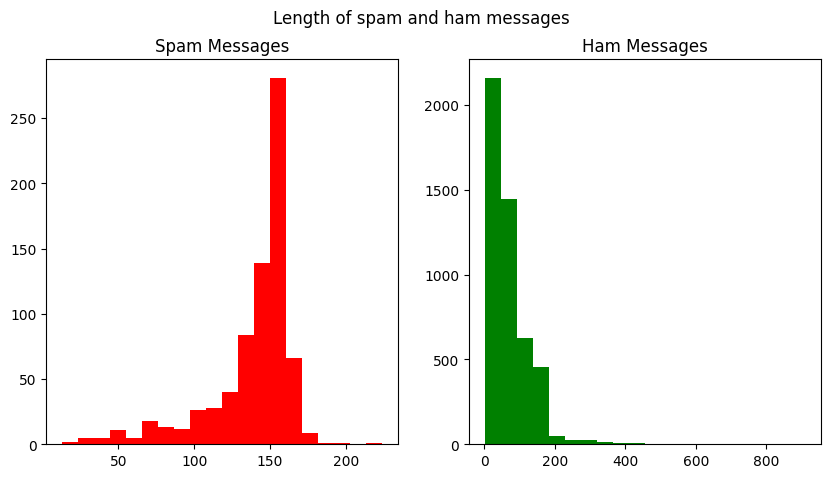

In [10]:
# plotting average length of spam and ham messages in matplotlib
spam = data[data['label'] == 'spam']
ham = data[data['label'] == 'ham']

spam_length = spam['text'].str.len()
ham_length = ham['text'].str.len()

# Make two separate bar charts
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(spam_length, bins=20, color='red')
ax[0].set_title('Spam Messages')
ax[1].hist(ham_length, bins=20, color='green')
ax[1].set_title('Ham Messages')
fig.suptitle('Length of spam and ham messages')
plt.show()

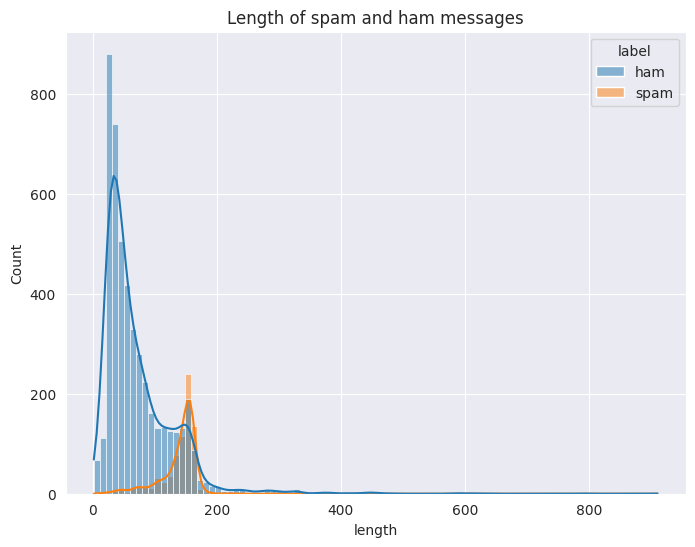

In [15]:
# Plotting the length of spam and ham messages in saeborn
import seaborn as sns
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=data, x='length', hue='label', ax=ax, kde=True)
ax.set_title('Length of spam and ham messages')
plt.show()

## Preprocess the text column 🦖

In [19]:
# remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(data.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/juliusdoebelt/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


  label                                               text  length
0   ham  Go jurong point, crazy.. Available bugis n gre...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry 2 wkly comp win FA Cup final tkts 2...     155
3   ham          U dun say early hor... U c already say...      49
4   ham          Nah I think goes usf, lives around though      61


In [24]:
# Remove punctuation from the text using list(string.punctuation)
import string
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (string.punctuation)]))
print(data.head())

  label                                               text  length
0   ham  go jurong point, crazy.. avail bugi n great wo...     111
1   ham                        ok lar... joke wif u oni...      29
2  spam  free entri 2 wkli comp win fa cup final tkt 21...     155
3   ham          u dun say earli hor... u c alreadi say...      49
4   ham            nah i think goe usf, live around though      61


In [21]:
# set all words to lowercase
data['text'] = data['text'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))
print(data.head())

  label                                               text  length
0   ham  go jurong point, crazy.. available bugis n gre...     111
1   ham                      ok lar... joking wif u oni...      29
2  spam  free entry 2 wkly comp win fa cup final tkts 2...     155
3   ham          u dun say early hor... u c already say...      49
4   ham          nah i think goes usf, lives around though      61


In [23]:
# Stem root of word using nltl.stem.PorterStemmer() and the stem function
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
data['text'] = data['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
print(data.head())

  label                                               text  length
0   ham  go jurong point, crazy.. avail bugi n great wo...     111
1   ham                        ok lar... joke wif u oni...      29
2  spam  free entri 2 wkli comp win fa cup final tkt 21...     155
3   ham          u dun say earli hor... u c alreadi say...      49
4   ham            nah i think goe usf, live around though      61


## Visualize most frequent words in spam and ham 🤑

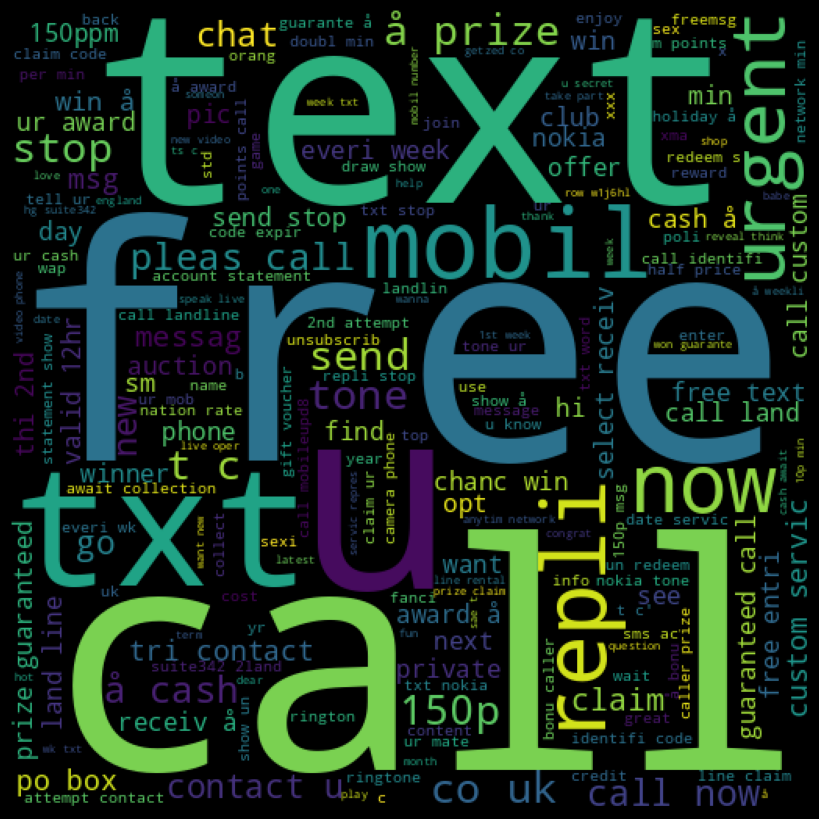

In [25]:
# Use WordCloud to visualize the most common words in spam messages
from wordcloud import WordCloud
spam_words = ' '.join(list(data[data['label'] == 'spam']['text']))
spam_wordcloud = WordCloud(width=512, height=512).generate(spam_words)
plt.figure(figsize=(10, 8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

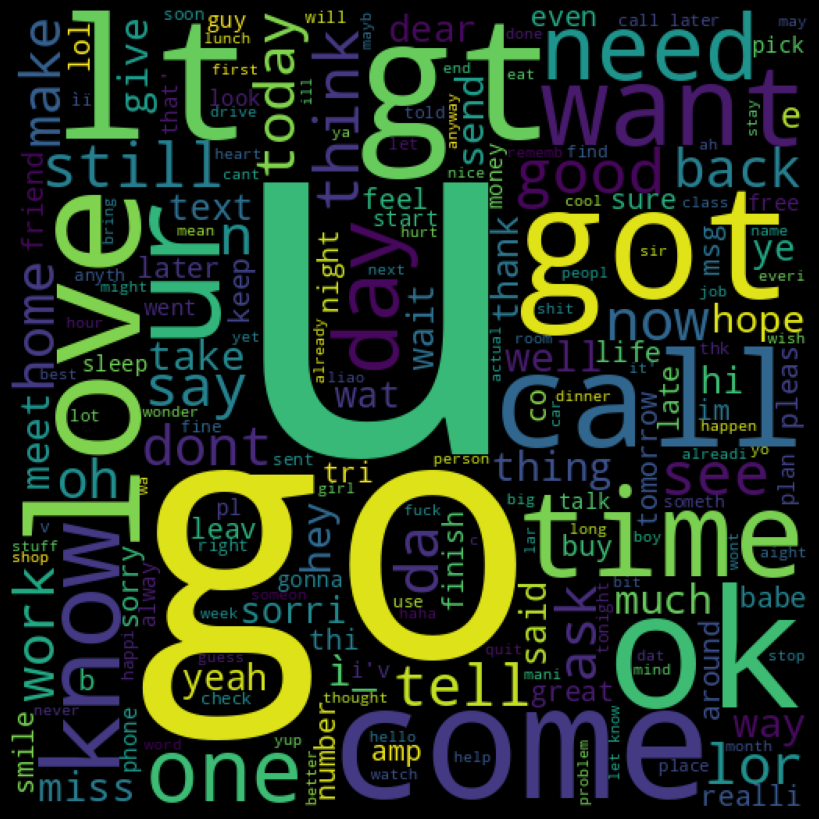

In [26]:
# Use WordCloud to visualize the most common words in ham messages
ham_words = ' '.join(list(data[data['label'] == 'ham']['text']))
ham_wordcloud = WordCloud(width=512, height=512).generate(ham_words)
plt.figure(figsize=(10, 8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


## Create tf-idf matrix

In [28]:
# Create a tf-idf matrix by using an instance of the TfidfVectorizer class and the .toarray()
# function, encode labels into a binary variably with the help of the LabelEncoder class
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['text']).toarray()
print(X.shape)

le = LabelEncoder()
y = le.fit_transform(data['label'])
print(y.shape)

(5572, 8300)
(5572,)


In [31]:
# Split the data into training and testing sets with the help of the train_test_split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1703)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3900, 8300)
(1672, 8300)
(3900,)
(1672,)


In [33]:
# Train a logistic regression model on the training set and evaluate its performance on the testing set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print("---------------------------------------------")
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print("---------------------------------------------")
print('Classification report: \n', classification_report(y_test, y_pred))

Accuracy score:  0.9515550239234449
---------------------------------------------
Confusion matrix: 
 [[1440    5]
 [  76  151]]
---------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1445
           1       0.97      0.67      0.79       227

    accuracy                           0.95      1672
   macro avg       0.96      0.83      0.88      1672
weighted avg       0.95      0.95      0.95      1672



In [34]:
# Train a Multinomial Naive Bayes model on the training set and evaluate its performance on the testing set
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print("---------------------------------------------")
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print("---------------------------------------------")
print('Classification report: \n', classification_report(y_test, y_pred))

Accuracy score:  0.9557416267942583
---------------------------------------------
Confusion matrix: 
 [[1445    0]
 [  74  153]]
---------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1445
           1       1.00      0.67      0.81       227

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672

